William Austin<br>
Prakash Dhimal<br>
George Mason University<br>
CS 584 Theory and Applications of Data Mining<br>
Semester project: Predicting the Impact of COVID-19

In [1]:
import pandas as pd
import numpy as np

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,208,208,208,208,208,220,235,235,235,235
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,34,34,51,56,65,70,85,106,122,128
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,8,11,11,11,11,11,11,11,11,11
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,522,612,612,661,729,801,907,1118,1322,1524


In [4]:
confirmed_df.get("Country/Region")

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
261    Sao Tome and Principe
262                    Yemen
263                  Comoros
264               Tajikistan
265                  Lesotho
Name: Country/Region, Length: 266, dtype: object

In [5]:
len(confirmed_df.get("Country/Region"))

266

In [6]:
confirmed_df["Country/Region"]

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
261    Sao Tome and Principe
262                    Yemen
263                  Comoros
264               Tajikistan
265                  Lesotho
Name: Country/Region, Length: 266, dtype: object

In [7]:
# This is the data for Afganistan
confirmed_df.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                        33
Long                       65
1/22/20                     0
                     ...     
5/13/20                  5226
5/14/20                  5639
5/15/20                  6053
5/16/20                  6402
5/17/20                  6664
Name: 0, Length: 121, dtype: object

In [8]:
# last column, the last date this is reported?
confirmed_df.iloc[0][-1]

6664

In [9]:
# this is the data for albania
confirmed_df.iloc[1]

Province/State        NaN
Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
                   ...   
5/13/20               880
5/14/20               898
5/15/20               916
5/16/20               933
5/17/20               946
Name: 1, Length: 121, dtype: object

In [10]:
# This is the 1/22/20 column, when the first case was reported
confirmed_df.iloc[:,4]

0      0
1      0
2      0
3      0
4      0
      ..
261    0
262    0
263    0
264    0
265    0
Name: 1/22/20, Length: 266, dtype: int64

In [11]:
# This is basically the total for all of these countries reporting
confirmed_df.iloc[:,-1]

0      6664
1       946
2      7019
3       761
4        48
       ... 
261     235
262     128
263      11
264    1524
265       1
Name: 5/17/20, Length: 266, dtype: int64

In [12]:
# US data only
us_data = confirmed_df.loc[confirmed_df['Country/Region'] == 'US']
us_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757


In [13]:
us_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757


In [14]:
us_time_series_only = us_data.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)

In [15]:
# Just the time series data for US cases
us_time_series_only

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
225,1,1,2,2,5,5,5,5,5,7,...,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757


In [16]:
idx = pd.date_range('2020-01-22', periods=5, freq='D')
idx

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26'],
              dtype='datetime64[ns]', freq='D')

In [17]:
transposed = us_time_series_only.transpose()
transposed

,225
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
5/13/20,1390406
5/14/20,1417774
5/15/20,1442824
5/16/20,1467820


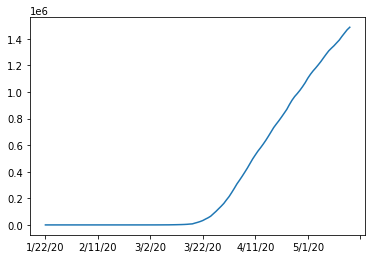

In [18]:
# we have to transpose and plot this thing
transposed.plot(legend=False)

In [19]:
#This is the last column?
confirmed_df.iloc[:,-1]

0      6664
1       946
2      7019
3       761
4        48
       ... 
261     235
262     128
263      11
264    1524
265       1
Name: 5/17/20, Length: 266, dtype: int64

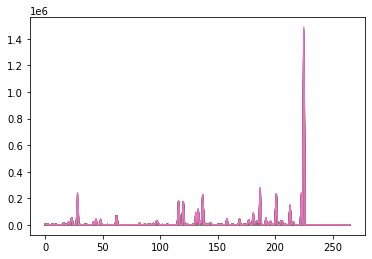

In [20]:
confirmed_df.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).plot(legend=False)

In [21]:
confirmed_df.index

RangeIndex(start=0, stop=266, step=1)